<a href="https://colab.research.google.com/github/isorser/Situaciones-de-Aprendizaje-IA/blob/main/SA_IA_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('parkinsons.data')

In [19]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [20]:
data.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [21]:
f = 0.75
N_train = int(f * len(data))
N_test = len(data) - N_train
[N_train, N_test]

[146, 49]

In [22]:
data_train = data.iloc[:N_train]
data_test = data.iloc[N_train:]

In [45]:
feat_index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23]
subset_feat_index = feat_index
features = [data_train.columns[i] for i in subset_feat_index]
target = data_train.columns[17]

In [46]:
X_train = np.array(data_train[features])
Y_train = np.array(data_train['status'])

In [47]:
X_test = np.array(data_test[features])
Y_test = np.array(data_test['status'])

In [55]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=3, min_samples_split = 2, min_samples_leaf = 1)
clf = clf.fit(X_train, Y_train)

In [56]:
Y_pred = clf.predict(X_test)
Y_pred_float = clf.predict_proba(X_test)

In [57]:
clf.max_features_

22

In [58]:
clf.tree_.node_count

5

[Text(0.4, 0.8333333333333334, 'X[21] <= 0.106\ngini = 0.275\nsamples = 146\nvalue = [24, 122]'),
 Text(0.2, 0.5, 'gini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.6, 0.5, 'X[18] <= -6.428\ngini = 0.077\nsamples = 125\nvalue = [5, 120]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 106\nvalue = [0, 106]')]

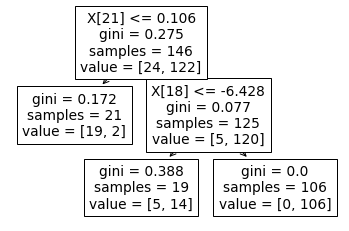

In [59]:
tree.plot_tree(clf)

In [61]:
Y_pred - Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

0.6041666666666667


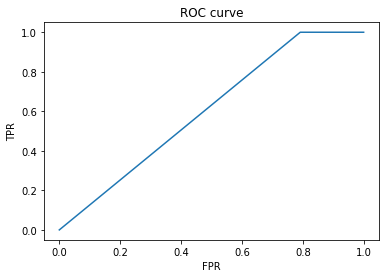

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)

print(roc_auc_score(Y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(Y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()